In [1]:
import pandas as pd

In [2]:
data_path = 'Data/Douban_movies_rs.csv'

ratings_explicit = pd.read_csv(data_path)
ratings_explicit.head(1)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4


In [3]:
ratings_explicit.shape

(50000, 12)

数据属性简介。

|  属性  |                  描述    |
|:------:|:--------------------------------------:|
| `ID` | 自增字段 |
| `Movie_Name` | 电影名 |
| `Movie_Score` | 电影总体评分 |
| `Review_Count`  | 评论量统计 |
| `Movie_Star_Distribution` | 电影的评分分布 |
| `Collect_Date` |  数据收集时间 |
| `Username` | 用户昵称 |
| `Post_Date` | 评论发表日期 |
| `Score` | 用户评分 |
| `User_Comment` | 用户评论 |
| `User_Comment_Distribution` | 用户评分情况 |
| `Comment_Like_Count` | 用户评论点赞量 |

#### 数据 EDA 

按照电影名个用户名字进行去重，并保留首次出现的数据。

In [4]:
ratings_explicit.drop_duplicates(
    subset=['Movie_Name', 'Username'], keep='first', inplace=True)

查看数据统计描述。

In [5]:
ratings_explicit.describe()

,ID,Movie_Score,Review_Count,Score,Comment_Like_Count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25295.903460,7.402504,11102.232880,3.603760,0.68928
std,14608.509221,0.810837,18713.833338,0.952855,9.68737
min,0.000000,4.900000,273.000000,1.000000,0.00000
25%,12643.750000,6.900000,1937.000000,3.000000,0.00000
50%,25279.500000,7.500000,4267.000000,4.000000,0.00000
75%,37962.250000,7.900000,9560.000000,4.000000,0.00000
max,50598.000000,9.300000,76349.000000,5.000000,652.00000


查看数据结构。

In [6]:
ratings_explicit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 12 columns):
ID                           50000 non-null int64
Movie_Name                   50000 non-null object
Movie_Score                  50000 non-null float64
Review_Count                 50000 non-null int64
Movie_Star_Distribution      50000 non-null object
Collect_Date                 50000 non-null object
Username                     49994 non-null object
Post_Date                    50000 non-null object
Score                        50000 non-null int64
User_Comment                 50000 non-null object
User_Comment_Distribution    50000 non-null object
Comment_Like_Count           50000 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 5.0+ MB


查看总体用户数量。

In [7]:
len(ratings_explicit.Username.unique())

34811

查看总体电影数量。

In [8]:
len(ratings_explicit.Movie_Name.unique())

116

统计观看电影最多的 topk 的用户。

In [9]:
topk = 10
ratings_explicit['Username'].value_counts()[:topk]

[已注销]    100
已注销       39
M & R     39
麦克阿瑟      29
圣墟        28
火娃        26
vivi      23
陆支羽       23
上林苑       21
北西南东      21
Name: Username, dtype: int64

查看前 topk 个用户的观影分布。

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

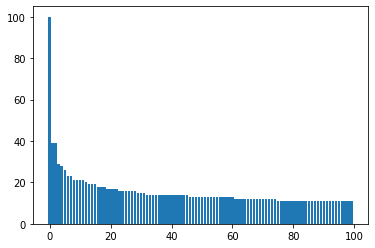

In [11]:
topk = 100
number_count = ratings_explicit['Username'].value_counts()
plt.bar(range(len(number_count[:topk])), number_count[:topk])
plt.show()

统计观看人数 topk 的电影。

In [12]:
topk = 10
ratings_explicit['Movie_Name'].value_counts()[:topk]

九条命 Nine Lives                                                                        1488
不惧风暴 Into the Storm                                                                   1483
关云长                                                                                   1461
传奇 Legend                                                                             1451
神探伽利略 ガリレオ                                                                            1239
副总统 Vice                                                                              1232
冲出康普顿 Straight Outta Compton                                                          1139
动物园长的夫人 The Zookeeper's Wife                                                          1129
他们先杀了我父亲：一个柬埔寨女儿的回忆录 First They Killed My Father: A Daughter of Cambodia Remembers    1064
42号传奇 42                                                                              1038
Name: Movie_Name, dtype: int64

#### 数据可视化

用户对电影的打分情况。

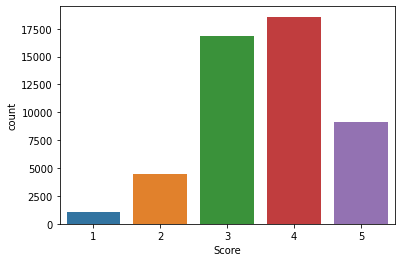

In [13]:
sns.countplot(data=ratings_explicit, x='Score')
plt.show()

提取用户评价时间和统计信息。

In [14]:
post_time, post_count = [], []

for i in ratings_explicit['Post_Date'].groupby(
        ratings_explicit['Post_Date']).count().items():
    # 取出时间标签
    post_time.append(i[0])
    # 取出计数信息
    post_count.append(i[1])

##### 用户评论时间序列

使用折线图对用户评论时间进行可视化。

In [15]:
!pip install pyecharts==1.6.2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [16]:
from pyecharts.charts import Line
from pyecharts import options as opts

# 加载图的配置，长宽的参数设置
line = Line(init_opts=opts.InitOpts(width='660px', height='350px'))

# 设置横坐标为时间
line.add_xaxis(post_time)

# 设置纵坐标为用户评论条数
line.add_yaxis("", post_count)

# 设置标题
line.set_global_opts(title_opts=opts.TitleOpts(title='用户评论时间序列图'))

# 设置显示统计量
line.set_series_opts(label_opts=opts.LabelOpts(is_show=True), )
line.render_notebook()

##### 用户评论关键词云

In [17]:
from jieba import analyse

# 默认提取前 20 个关键词
def get_key_words(comment, topK=20):
    return analyse.textrank(comment, topK, withWeight=False, allowPOS=('n'))

In [18]:
# 使用测试样例进行测试。
comment = '电影院环境不错'
get_key_words(comment)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.868 seconds.
Prefix dict has been built successfully.


['电影院', '环境']

提取影评中的 topK 关键词，数据量有些大，请耐心等待。

In [20]:
from tqdm.notebook import tqdm

keys_words_list = []
for comment in tqdm(ratings_explicit['User_Comment']):
    keys_words_list += get_key_words(comment)

In [21]:
# 加载词频统计模块
from sklearn.feature_extraction.text import CountVectorizer

# 设定 topn 的高频词语阈值，可以根据需要进行改变大小
topn = 500

# 加载统计模块
count_extract = CountVectorizer(max_features=topn)

# 开始对语料进行统计
count_extract.fit_transform(keys_words_list)

# 输入数据中的每一个词为（word，value）这样的元祖形式，然后将所有的词放入一个list中
comment_count_pair = [(k, int(v))
                      for k, v in count_extract.vocabulary_.items()]

In [22]:
# 加载词云模块
from pyecharts.charts import WordCloud

comment_wordcloud = WordCloud()

# word_size_range 表示词语大小范围，可以根据需要改变
comment_wordcloud.add(series_name="",
                      data_pair=comment_count_pair,
                      word_size_range=[5, 100])

# 设置词云的全局配置
comment_wordcloud.set_global_opts(
    title_opts=opts.TitleOpts(
        title="用户评论关键词云分析",
        # 设置标题文字大小
        title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    # 显示词云中的词频数字
    tooltip_opts=opts.TooltipOpts(is_show=True),)

# 直接在 notebook 中显示词云
comment_wordcloud.render_notebook()

根据用户评论对电影进行标签化。

In [23]:
ratings_explicit.head(1)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4


In [24]:
movie_list = ratings_explicit['Movie_Name'].unique()
movie_list[0]

'1988年的妮可 Nico, 1988'

批量从用户评论中提取电影关键词。

In [25]:
movie_map = dict()
for movie_name in tqdm(movie_list):
    comment_text = ratings_explicit[ratings_explicit['Movie_Name']==movie_name]['User_Comment'].values
    # 构建电影关键词标签
    movie_map[movie_name] = get_key_words(str(comment_text))

为电影打上用户评价标签。

In [26]:
ratings_explicit['Movie_Tags'] = ratings_explicit['Movie_Name'].apply(lambda x : movie_map[x])
ratings_explicit.head(1)

,ID,Movie_Name,Movie_Score,Review_Count,Movie_Star_Distribution,Collect_Date,Username,Post_Date,Score,User_Comment,User_Comment_Distribution,Comment_Like_Count,Movie_Tags
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4,"[音乐, 电影, 儿子, 丝绒, 人物, 传记, 传记片, 歌声, 巅峰, 人生, 经历, ..."


对处理好的数据进行存储。

In [27]:
ratings_explicit.to_csv('Data/New_Movie_RS.csv',index=False)